<a href="https://colab.research.google.com/github/SSILY/Proyecto-Integracion/blob/main/Proyecto_finalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Se empieza con el tratamiento de la base de datos

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Obfuscated-MalMem2022.csv")

In [4]:
df.shape

(58596, 57)

In [5]:
df.dtypes

Category                                   object
pslist.nproc                                int64
pslist.nppid                                int64
pslist.avg_threads                        float64
pslist.nprocs64bit                          int64
pslist.avg_handlers                       float64
dlllist.ndlls                               int64
dlllist.avg_dlls_per_proc                 float64
handles.nhandles                            int64
handles.avg_handles_per_proc              float64
handles.nport                               int64
handles.nfile                               int64
handles.nevent                              int64
handles.ndesktop                            int64
handles.nkey                                int64
handles.nthread                             int64
handles.ndirectory                          int64
handles.nsemaphore                          int64
handles.ntimer                              int64
handles.nsection                            int64


In [6]:
df.describe()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58596.000000             58596.0   
mean      41.394771     14.713837           11.341655                 0.0   
std        5.777249      2.656748            1.588231                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861955                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              34.962500     670.000000                   7.333333   
25%             208.725000    1556.000000                  38.833333   
50%             243.963710    1735.000000                  42.781524   
75%             289.974322    2087.000000                  49.605280   
max           24845.951220    3443.000000                  53.170732   

       handles.nhandles  handles.avg_handles_per_proc  handles.nport  ...  \
count      5.859600e+04                  58596.000000        58596.0  ...   
mean       1.025858e+04                    249.560958            0.0  ...   
std        4.866864e+03                    145.999866            0.0  ...   
min        3.514000e+03                     71.139241            0.0  ...   
25%        8.393000e+03                    209.648228            0.0  ...   
50%        9.287500e+03                    247.208951            0.0  ...   
75%        1.219300e+04                    291.355050            0.0  ...   
max        1.047310e+06                  33784.193550            0.0  ...   

       svcscan.nservices  svcscan.kernel_drivers  svcscan.fs_drivers  \
count       58596.000000            58596.000000        58596.000000   
mean          391.347549              221.406581           25.996245   
std             4.529704                1.991087            0.170790   
min            94.000000               55.000000            6.000000   
25%           389.000000              221.000000           26.000000   
50%           389.000000              221.000000           26.000000   
75%           395.000000              222.000000           26.000000   
max           395.000000              222.000000           26.000000   

       svcscan.process_services  svcscan.shared_process_services  \
count              58596.000000                     58596.000000   
mean                  25.063417                       116.879514   
std                    1.529628                         1.550401   
min                    7.000000                        26.000000   
25%                   24.000000                       116.000000   
50%                   24.000000                       116.000000   
75%                   27.000000                       118.000000   
max                   27.000000                       118.000000   

       svcscan.interactive_process_services  svcscan.nactive  \
count                               58596.0     58596.000000   
mean                                    0.0       121.995546   
std                                     0.0         2.822858   
min                                     0.0        30.000000   
25%                                     0.0       121.000000   
50%                                     0.0       122.000000   
75%                                     0.0       123.000000   
max                                     0.0       129.000000   

       callbacks.ncallbacks  callbacks.nanonymous  callbacks.ngeneric  
count          58596.000000          58596.000000        58

In [7]:
def contar_ocurrencias(df, columna):
    return df[columna].apply(lambda x: 1 if x > 0 else 0).sum()

def contar_ocurrencias_columnas(df, columnas):
    resultados = {}
    for columna in columnas:
        if columna != 'Category' and columna != 'Class':  # Excluir la primera y la última columna
            resultado = contar_ocurrencias(df, columna)
            resultados[columna] = resultado
    return resultados

# Lista de nombres de columnas
columnas = df.columns.tolist()

# Generar el diccionario de resultados
resultados = contar_ocurrencias_columnas(df, columnas)

# Imprimir el diccionario de resultados
print(resultados)

{'pslist.nproc': 58596, 'pslist.nppid': 58596, 'pslist.avg_threads': 58596, 'pslist.nprocs64bit': 0, 'pslist.avg_handlers': 58596, 'dlllist.ndlls': 58596, 'dlllist.avg_dlls_per_proc': 58596, 'handles.nhandles': 58596, 'handles.avg_handles_per_proc': 58596, 'handles.nport': 0, 'handles.nfile': 58596, 'handles.nevent': 58596, 'handles.ndesktop': 58596, 'handles.nkey': 58596, 'handles.nthread': 58596, 'handles.ndirectory': 58596, 'handles.nsemaphore': 58596, 'handles.ntimer': 58596, 'handles.nsection': 58596, 'handles.nmutant': 58596, 'ldrmodules.not_in_load': 58596, 'ldrmodules.not_in_init': 58596, 'ldrmodules.not_in_mem': 58596, 'ldrmodules.not_in_load_avg': 58596, 'ldrmodules.not_in_init_avg': 58596, 'ldrmodules.not_in_mem_avg': 58596, 'malfind.ninjections': 58596, 'malfind.commitCharge': 58596, 'malfind.protection': 58596, 'malfind.uniqueInjections': 58596, 'psxview.not_in_pslist': 29502, 'psxview.not_in_eprocess_pool': 122, 'psxview.not_in_ethread_pool': 32958, 'psxview.not_in_pspcid

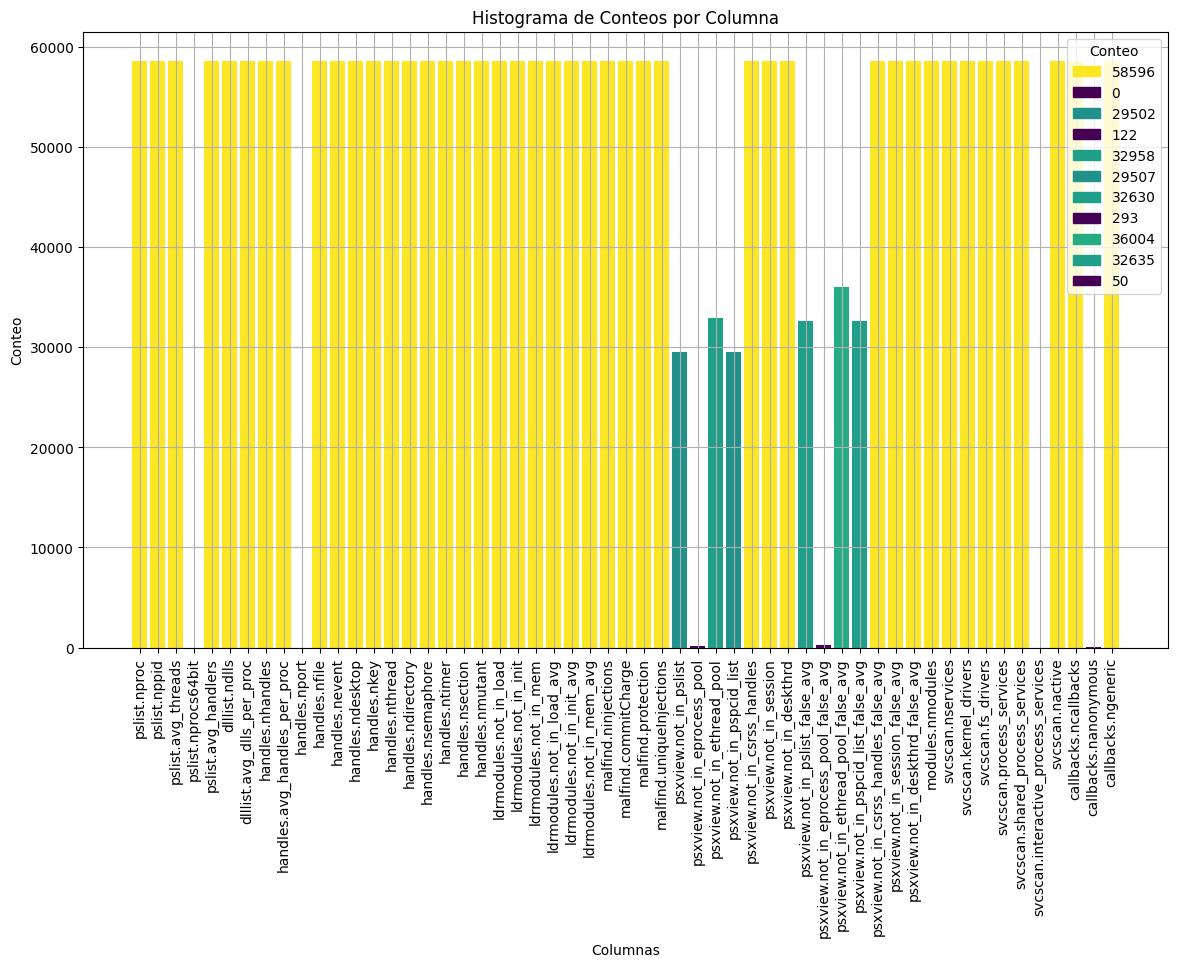

In [8]:
# Extraer las llaves y los valores del diccionario
columnas = list(resultados.keys())
conteos_valores = list(resultados.values())

# Crear el histograma con colores diferentes y leyendas numéricas con los valores de los conteos
plt.figure(figsize=(14, 8))
legend_labels = {}
for columna, conteo in zip(columnas, conteos_valores):
    if conteo not in legend_labels:
        plt.bar(columna, conteo, color=plt.cm.viridis(conteo / max(conteos_valores)), label=str(conteo))
        legend_labels[conteo] = columna
    else:
        plt.bar(columna, conteo, color=plt.cm.viridis(conteo / max(conteos_valores)))

plt.xlabel('Columnas')
plt.ylabel('Conteo')
plt.title('Histograma de Conteos por Columna')
plt.xticks(rotation=90)
legend_handles = [plt.Rectangle((0,0),1,1, color=plt.cm.viridis(cont / max(conteos_valores))) for cont in legend_labels]
plt.legend(legend_handles, legend_labels.keys(), title='Conteo', loc='best')
plt.grid(True)
plt.show()

In [9]:

df = df.dropna()  # Eliminar las filas donde la 'Category' es None


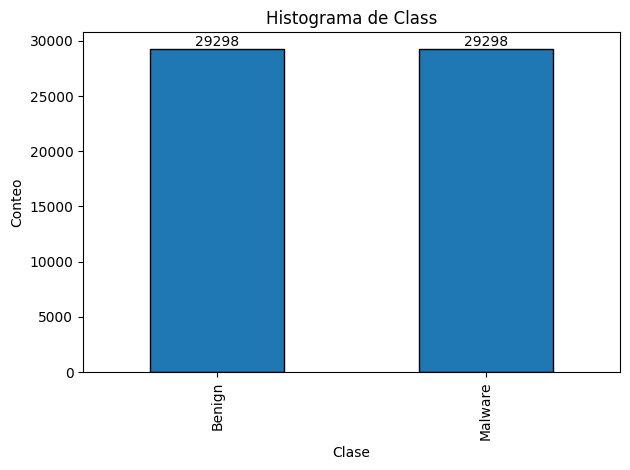

In [10]:
# Histograma de 'Class'

# Obtener los conteos de cada clase
contadores_clase = df['Class'].value_counts()

# Crear el histograma de Class
contadores_clase.plot(kind='bar', edgecolor='black')

# Añadir anotaciones con los valores de cada barra
for i, cont in enumerate(contadores_clase):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

# Configurar título y etiquetas
plt.title('Histograma de Class')
plt.xlabel('Clase')
plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

In [11]:
# Encontrar las columnas que no tienen el valor 58596
columnas_a_limpiar = [columna for columna, conteo in resultados.items() if conteo != 58596]

# Mostrar las columnas que no cumplen el criterio
print("Columnas que no cumplen el criterio:")
print(columnas_a_limpiar)

Columnas que no cumplen el criterio:
['pslist.nprocs64bit', 'handles.nport', 'psxview.not_in_pslist', 'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool', 'psxview.not_in_pspcid_list', 'psxview.not_in_pslist_false_avg', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_ethread_pool_false_avg', 'psxview.not_in_pspcid_list_false_avg', 'svcscan.interactive_process_services', 'callbacks.nanonymous']


In [12]:
# Eliminar las columnas del DataFrame
df_limpio = df.drop(columns = columnas_a_limpiar)

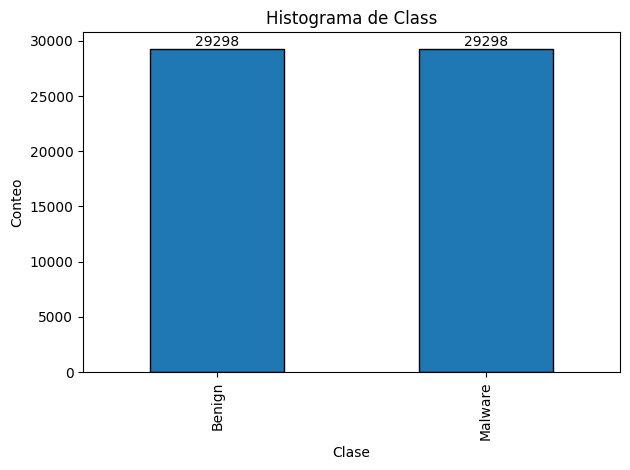

In [13]:
# Histograma de 'Class'

# Obtener los conteos de cada clase
contadores_clase = df['Class'].value_counts()

# Crear el histograma de Class
contadores_clase.plot(kind='bar', edgecolor='black')

# Añadir anotaciones con los valores de cada barra
for i, cont in enumerate(contadores_clase):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

# Configurar título y etiquetas
plt.title('Histograma de Class')
plt.xlabel('Clase')
plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

In [14]:
# Reemplazar los valores en la columna 'Class'
df_limpio['Class'] = df_limpio['Class'].replace({'Benign': 0, 'Malware': 1})

# Muestra del DataFrame después del reemplazo
print(df_limpio['Class'].value_counts())  # Verificación de los nuevos valores únicos
df_limpio.head()  # Muestra las primeras filas del DataFrame para verificar los cambios

Class
0    29298
1    29298
Name: count, dtype: int64


Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign            45            17           10.555556   
1   Benign            47            19           11.531915   
2   Benign            40            14           14.725000   
3   Benign            32            13           13.500000   
4   Benign            42            16           11.452381   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0           202.844444           1694                  38.500000   
1           242.234043           2074                  44.127660   
2           288.225000           1932                  48.300000   
3           264.281250           1445                  45.156250   
4           281.333333           2067                  49.214286   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0              9129                    212.302326            670  ...   
1             11385                    242.234043            840  ...   
2             11529                    288.225000           1050  ...   
3              8457                    264.281250            630  ...   
4             11816                    281.333333            908  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0               138                389                     221   
1               138                392                     222   
2               137                395                     222   
3               138                395                     222   
4               138                392                     222   

   svcscan.fs_drivers  svcscan.process_services  \
0                  26                        24   
1                  26                        24   
2                  26                        27   
3                  26                        27   
4                  26                        24   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                              116              121                    87   
1                              118              122                    87   
2                              118              120                    88   
3                              118              120                    88   
4                              118              124                    87   

   callbacks.ngeneric  Class  
0                   8      0  
1                   8      0  
2                   8      0  
3                   8      0  
4                   8      0  

[5 rows x 45 columns]

In [15]:
# Normalizar el DataFrame
df_normalizado = df_limpio.apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.name not in ['Category', 'Class'] else x)

# Muestra del DataFrame normalizado
df_normalizado.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign      0.109589      0.140625            0.587121   
1   Benign      0.118721      0.171875            0.651490   
2   Benign      0.086758      0.093750            0.862002   
3   Benign      0.050228      0.078125            0.781241   
4   Benign      0.095890      0.125000            0.646246   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0             0.006766       0.369275                   0.679940   
1             0.008354       0.506311                   0.802714   
2             0.010208       0.455103                   0.893739   
3             0.009243       0.279481                   0.825154   
4             0.009930       0.503787                   0.913685   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0          0.005379                      0.004187       0.000501  ...   
1          0.007541                      0.005075       0.000712  ...   
2          0.007679                      0.006439       0.000972  ...   
3          0.004736                      0.005729       0.000451  ...   
4          0.007954                      0.006235       0.000796  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0          1.000000           0.980066                0.994012   
1          1.000000           0.990033                1.000000   
2          0.916667           1.000000                1.000000   
3          1.000000           1.000000                1.000000   
4          1.000000           0.990033                1.000000   

   svcscan.fs_drivers  svcscan.process_services  \
0                 1.0                      0.85   
1                 1.0                      0.85   
2                 1.0                      1.00   
3                 1.0                      1.00   
4                 1.0                      0.85   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                         0.978261         0.919192              0.948718   
1                         1.000000         0.929293              0.948718   
2                         1.000000         0.909091              0.974359   
3                         1.000000         0.909091              0.974359   
4                         1.000000         0.949495              0.948718   

   callbacks.ngeneric  Class  
0                 1.0      0  
1                 1.0      0  
2                 1.0      0  
3                 1.0      0  
4                 1.0      0  

[5 rows x 45 columns]

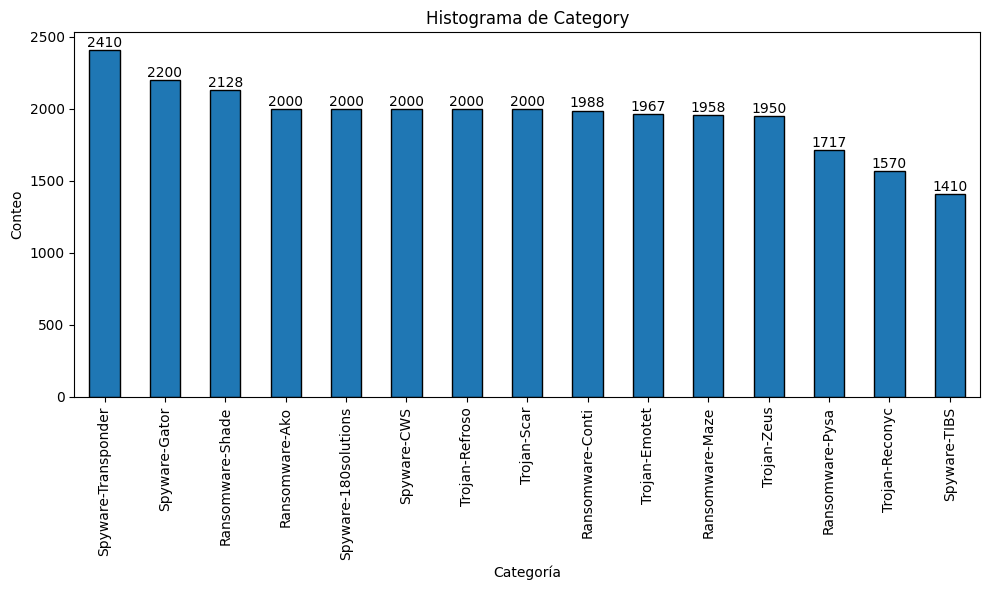

In [16]:
# Preprocesar los datos de la columna 'Category' excluyendo 'Benign'
columna_filtrada = df_normalizado[df_normalizado['Category'] != 'Benign'].copy()

# Truncar los nombres en la columna 'Category' hasta el segundo guion
columna_filtrada['Category'] = columna_filtrada['Category'].apply(lambda x: '-'.join(x.split('-')[:2]))

# Crear histograma con Matplotlib
plt.figure(figsize=(10, 6))

# Histograma de 'Category'
conteos = columna_filtrada['Category'].value_counts()
conteos.plot(kind='bar', edgecolor='black')
plt.title('Histograma de Category')
plt.xlabel('Categoría')
plt.ylabel('Conteo')

# Agregar etiquetas con valores en las barras
for i, cont in enumerate(conteos):
    plt.text(i, cont + 0.1, str(cont), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()

In [17]:
df_normalizado['Category'].value_counts()

Category
Benign                                                                                     29298
Spyware-Gator-1bdcd3b777965f67678748d2577b119a275aca9aed9549d45e64e692a54a7b5e-1.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-2.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-10.raw          2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-1.raw           2
                                                                                           ...  
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-6.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-5.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-4.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw           1
Ransomware-Shade-955d

In [18]:
# Copiamos el df para preservar los datos
df_norm_etiquetas = df_normalizado.copy()

# Se hace la magia
df_norm_etiquetas['Category'] = df_norm_etiquetas['Category'].apply(lambda x: x if x == 'Benign' else '-'.join(x.split('-')[:2]))

# Guardar el resultado en otro df
df_etiquetas_correctas = df_norm_etiquetas.copy()

df_etiquetas_correctas.head()

Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
0   Benign      0.109589      0.140625            0.587121   
1   Benign      0.118721      0.171875            0.651490   
2   Benign      0.086758      0.093750            0.862002   
3   Benign      0.050228      0.078125            0.781241   
4   Benign      0.095890      0.125000            0.646246   

   pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
0             0.006766       0.369275                   0.679940   
1             0.008354       0.506311                   0.802714   
2             0.010208       0.455103                   0.893739   
3             0.009243       0.279481                   0.825154   
4             0.009930       0.503787                   0.913685   

   handles.nhandles  handles.avg_handles_per_proc  handles.nfile  ...  \
0          0.005379                      0.004187       0.000501  ...   
1          0.007541                      0.005075       0.000712  ...   
2          0.007679                      0.006439       0.000972  ...   
3          0.004736                      0.005729       0.000451  ...   
4          0.007954                      0.006235       0.000796  ...   

   modules.nmodules  svcscan.nservices  svcscan.kernel_drivers  \
0          1.000000           0.980066                0.994012   
1          1.000000           0.990033                1.000000   
2          0.916667           1.000000                1.000000   
3          1.000000           1.000000                1.000000   
4          1.000000           0.990033                1.000000   

   svcscan.fs_drivers  svcscan.process_services  \
0                 1.0                      0.85   
1                 1.0                      0.85   
2                 1.0                      1.00   
3                 1.0                      1.00   
4                 1.0                      0.85   

   svcscan.shared_process_services  svcscan.nactive  callbacks.ncallbacks  \
0                         0.978261         0.919192              0.948718   
1                         1.000000         0.929293              0.948718   
2                         1.000000         0.909091              0.974359   
3                         1.000000         0.909091              0.974359   
4                         1.000000         0.949495              0.948718   

   callbacks.ngeneric  Class  
0                 1.0      0  
1                 1.0      0  
2                 1.0      0  
3                 1.0      0  
4                 1.0      0  

[5 rows x 45 columns]

In [19]:
df_etiquetas_correctas['Category'].value_counts()

Category
Benign                  29298
Spyware-Transponder      2410
Spyware-Gator            2200
Ransomware-Shade         2128
Ransomware-Ako           2000
Spyware-180solutions     2000
Spyware-CWS              2000
Trojan-Refroso           2000
Trojan-Scar              2000
Ransomware-Conti         1988
Trojan-Emotet            1967
Ransomware-Maze          1958
Trojan-Zeus              1950
Ransomware-Pysa          1717
Trojan-Reconyc           1570
Spyware-TIBS             1410
Name: count, dtype: int64

In [20]:
#Category_dummies = pd.get_dummies(df_etiquetas_correctas['Category'])
from sklearn.preprocessing import OneHotEncoder

# Creamos una copia del dataframe original
df = df_etiquetas_correctas.copy()

# Inicializar y ajustar el codificador one-hot
encoder = OneHotEncoder()

# Ajustar y transformar la columna 'Category'
X = df['Category'].values.reshape(-1, 1)
X_codificado = encoder.fit_transform(X)

# Obtener las catagorias codificadas
categorias_codificadas = encoder.categories_[0]

#Creamos un dataframe con las columnas codificadas
df_columnas_codificadas= pd.DataFrame(X_codificado.toarray(), columns=categorias_codificadas, index=df.index)

# Concatenamos
df_one_hot_FINAL = pd.concat([df, df_columnas_codificadas], axis=1)

# Eliminamos la columna 'Category'
df_one_hot_FINAL = df_one_hot_FINAL.drop('Category', axis = 1)

df_one_hot_FINAL.head()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.avg_handlers  \
0      0.109589      0.140625            0.587121             0.006766   
1      0.118721      0.171875            0.651490             0.008354   
2      0.086758      0.093750            0.862002             0.010208   
3      0.050228      0.078125            0.781241             0.009243   
4      0.095890      0.125000            0.646246             0.009930   

   dlllist.ndlls  dlllist.avg_dlls_per_proc  handles.nhandles  \
0       0.369275                   0.679940          0.005379   
1       0.506311                   0.802714          0.007541   
2       0.455103                   0.893739          0.007679   
3       0.279481                   0.825154          0.004736   
4       0.503787                   0.913685          0.007954   

   handles.avg_handles_per_proc  handles.nfile  handles.nevent  ...  \
0                      0.004187       0.000501        0.316922  ...   
1                      0.005075       0.000712        0.403552  ...   
2                      0.006439       0.000972        0.437482  ...   
3                      0.005729       0.000451        0.288045  ...   
4                      0.006235       0.000796        0.414092  ...   

   Spyware-180solutions  Spyware-CWS  Spyware-Gator  Spyware-TIBS  \
0                   0.0          0.0            0.0           0.0   
1                   0.0          0.0            0.0           0.0   
2                   0.0          0.0            0.0           0.0   
3                   0.0          0.0            0.0           0.0   
4                   0.0          0.0            0.0           0.0   

   Spyware-Transponder  Trojan-Emotet  Trojan-Reconyc  Trojan-Refroso  \
0                  0.0            0.0             0.0             0.0   
1                  0.0            0.0             0.0             0.0   
2                  0.0            0.0             0.0             0.0   
3                  0.0            0.0             0.0             0.0   
4                  0.0            0.0             0.0             0.0   

   Trojan-Scar  Trojan-Zeus  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          0.0  
4          0.0          0.0  

[5 rows x 60 columns]

# Comienza la fase de desarrollo de la red neuronal

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
#Eliminacion de columnas one-hot y 'Class'
one_hot_cols = [col for col in df_one_hot_FINAL.columns if 'Benign' in col or 'Ransomware' in col or 'Spyware' in col or 'Trojan' in col]
X_1 = df_one_hot_FINAL.drop(['Class'] + one_hot_cols, axis=1).values

In [23]:
# obtención de las etiquetas
y_1 = df_one_hot_FINAL['Class'].values

In [24]:
# Obtener la forma de los datos
print("Forma de X_1:", X_1.shape)
print("Forma de y_1:", y_1.shape)

Forma de X_1: (58596, 43)
Forma de y_1: (58596,)


In [25]:
# Obtener el número de características de entrada
input_dim = X_1.shape[1]

In [27]:
print(input_dim)

43


In [28]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y_1)

In [29]:
# Mostrar la forma de los conjuntos de entrenamiento y prueba (80 - 20)
print("Tamaño del conjunto de entrenamiento x:", len(X_train))
print("Tamaño del conjunto de prueba x:", len(X_test))
print("Tamaño del conjunto de entrenamiento y:", len(y_train))
print("Tamaño del conjunto de prueba y:", len(y_test))

Tamaño del conjunto de entrenamiento x: 46876
Tamaño del conjunto de prueba x: 11720
Tamaño del conjunto de entrenamiento y: 46876
Tamaño del conjunto de prueba y: 11720


# Codigo que pertenece al tratamiento de la base de datos

In [30]:
import numpy as np

# Contar la distribución de ceros y unos
unique, counts = np.unique(y_train, return_counts=True)
print("Valores únicos:", unique)
print("Frecuencia de cada valor:", counts)

Valores únicos: [0 1]
Frecuencia de cada valor: [23438 23438]


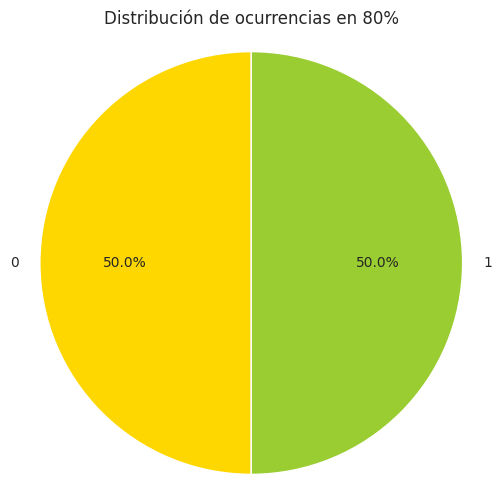

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la distribución de ceros y unos
unique, counts = np.unique(y_train, return_counts=True)

# Crear el gráfico de pastel
labels = [f'{value}' for value in unique]
colors = ['gold', 'yellowgreen']

plt.figure(figsize=(6, 6))  # Ajustar el tamaño de la figura
sns.set_style("whitegrid")  # Estilo de fondo
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Asegurar que el gráfico de pastel sea un círculo
plt.title('Distribución de ocurrencias en 80%')
plt.show()

In [32]:
import numpy as np

# Contar la distribución de ceros y unos
unique, counts = np.unique(y_test, return_counts=True)
print("Valores únicos:", unique)
print("Frecuencia de cada valor:", counts)

Valores únicos: [0 1]
Frecuencia de cada valor: [5860 5860]


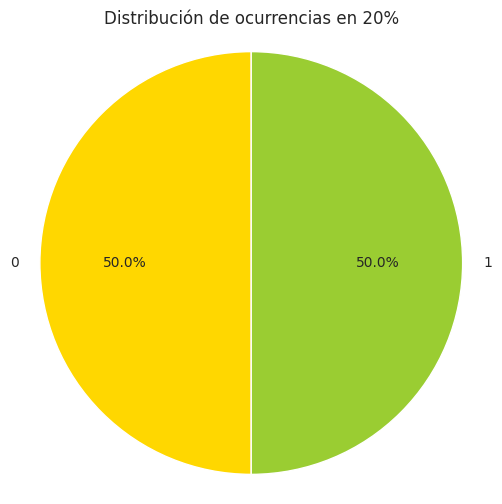

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la distribución de ceros y unos
unique, counts = np.unique(y_test, return_counts=True)

# Usar los conteos proporcionados
labels = [f'{value}' for value in unique]
colors = ['gold', 'yellowgreen']

plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")  # Estilo de fondo
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de ocurrencias en 20%')
plt.show()

In [34]:
# Crear el modelo
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu', input_shape=(43,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # La salida tiene que ser la misma que el shape del target (y)

In [35]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
epochs = 1000  # Número de épocas
batch_size = 500  # Tamaño del lote
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/1000


94/94 [==============================] - 3s 7ms/step - loss: 0.4282 - accuracy: 0.9127 - val_loss: 0.1191 - val_accuracy: 0.9851
Epoch 2/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9891 - val_loss: 0.0329 - val_accuracy: 0.9909
Epoch 3/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9931 - val_loss: 0.0184 - val_accuracy: 0.9931
Epoch 4/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0152 - val_accuracy: 0.9956
Epoch 5/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0140 - val_accuracy: 0.9966
Epoch 6/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0116 - val_accuracy: 0.9968
Epoch 7/1000
94/94 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.0108 - val_accuracy: 0.9968
Epoc

In [ ]:
# Guardar el modelo entrenado
from keras.models import load_model

# Guardar el modelo entrenado
model.save('modelo_binario_entrenado.keras')

In [36]:
# Cargar el modelo entrenado
from keras.models import load_model

# Cargar el modelo guardado
modelo_binario = load_model('/content/drive/MyDrive/modelo_binario/modelo_binario_entrenado_2.keras')

# Ahora puedes usar el modelo cargado para hacer predicciones
predicciones = modelo_binario.predict(X_test)

367/367 [==============================] - 1s 2ms/step


In [37]:
# Evaluar el modelo
loss, accuracy = modelo_binario.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

367/367 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9998
Test loss: 0.0010
Test accuracy: 0.9998


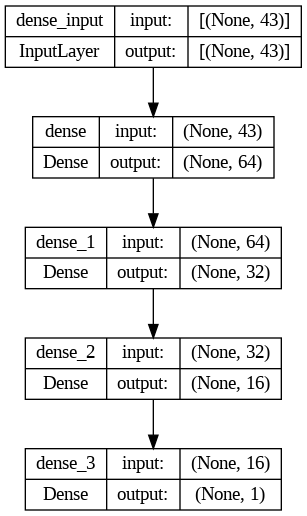

In [38]:
from keras.utils import plot_model

# Graficar la arquitectura del modelo
plot_model(model, to_file='modelo_binario.png', show_shapes=True, show_layer_names=True)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2816      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5441 (21.25 KB)
Trainable params: 5441 (21.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


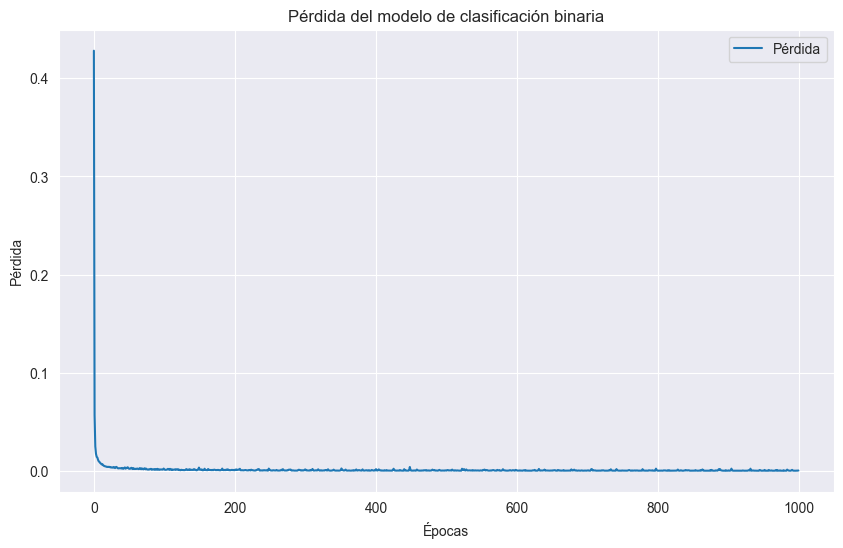

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Pérdida')
#sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del modelo de clasificación binaria')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

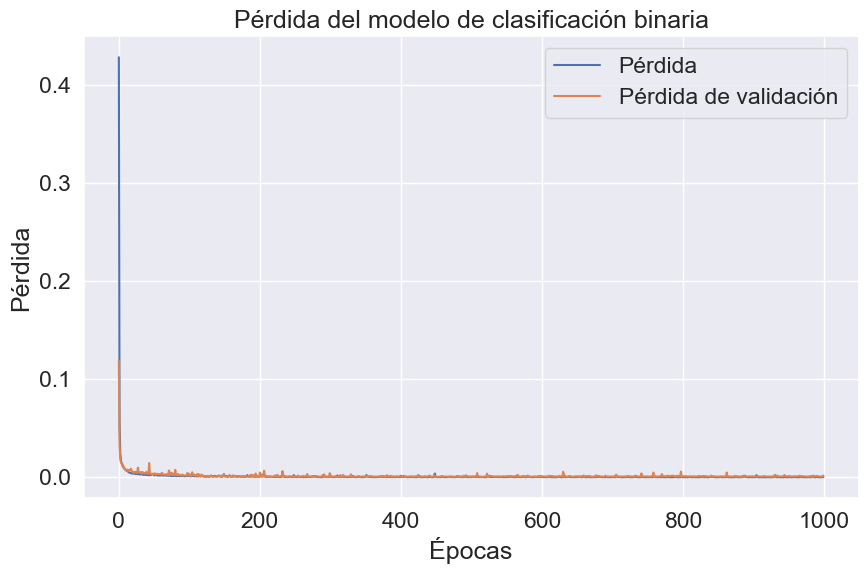

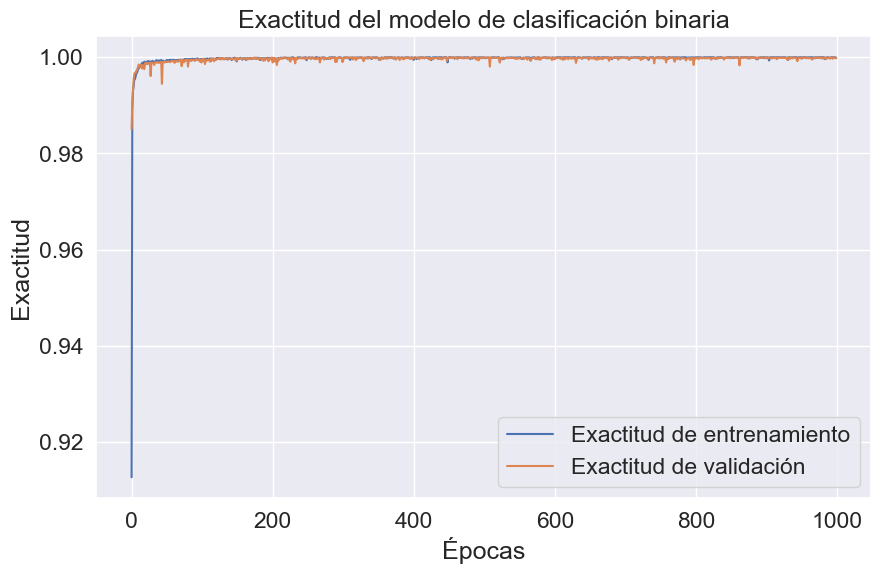

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Pérdida')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo de clasificación binaria')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Exactitud de entrenamiento')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Exactitud de validación')
plt.title('Exactitud del modelo de clasificación binaria')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [ ]:
print(predicciones)

[[9.999994e-01]
 [1.000000e+00]
 [5.698221e-23]
 ...
 [1.000000e+00]
 [9.999996e-01]
 [1.000000e+00]]


In [40]:
print(y_test)

[1 1 0 ... 1 1 1]


In [41]:
# Convertir las predicciones continuas en binarias usando un umbral
umbral = 0.5
y_pred = np.where(predicciones > umbral, 1, 0)

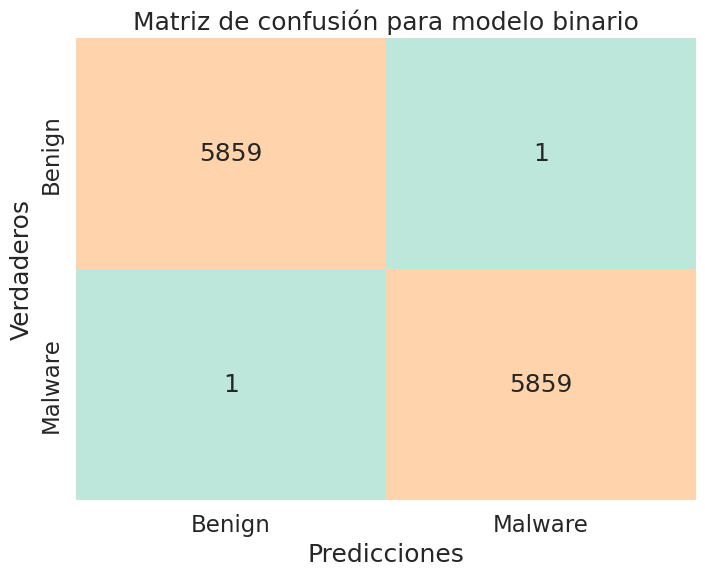

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definir etiquetas de clase
classes = ['Benign', 'Malware']

# Configurar el gráfico con Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)  # Escala de fuente
sns.heatmap(cm, annot=True, fmt='g', cmap='icefire', cbar=False, xticklabels=classes, yticklabels=classes)

# Añadir etiquetas
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de confusión para modelo binario')

# Mostrar el gráfico
plt.show()

In [43]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precisión: %.5f' % precision_score(y_true = y_test, y_pred = y_pred))
print('Recall: %.5f' % recall_score(y_true = y_test, y_pred = y_pred))
print('F1 score: %.5f' %f1_score(y_true = y_test, y_pred = y_pred))


Precisión: 0.99983
Recall: 0.99983
F1 score: 0.99983


In [44]:
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

  # Obtener las predicciones y las etiquetas reales
  y_pred = y_pred  # Reemplaza con tus predicciones

  # Supongamos que y_true_continuas son tus etiquetas reales continuas
  umbral = 0.5
  y_true = (y_test > umbral).astype(int)


  # Calcular la precisión (accuracy)
  accuracy = accuracy_score(y_true, y_pred)
  print(f"Exactitud (accuracy): {accuracy}")

  # Calcular la precisión (precision)
  precision = precision_score(y_true, y_pred)
  print(f"Precisión (precision): {precision}")

  # Calcular el recall
  recall = recall_score(y_true, y_pred)
  print(f"Recall: {recall}")

  # Calcular el puntaje F1
  f1 = f1_score(y_true, y_pred)
  print(f"Puntaje F1: {f1}")

Exactitud (accuracy): 0.9998293515358362
Precisión (precision): 0.9998293515358362
Recall: 0.9998293515358362
Puntaje F1: 0.9998293515358362


# Modelo Múltiple

In [45]:
# Eliminar las columnas one-hot y 'Class'
one_hot_cols = [col for col in df_one_hot_FINAL.columns if 'Benign' in col or 'Ransomware' in col or 'Spyware' in col or 'Trojan' in col]
X_2 = df_one_hot_FINAL.drop(['Class'] + one_hot_cols, axis=1).values

In [46]:
# Obtener las etiquetas
y_2 = df_one_hot_FINAL[one_hot_cols].values

In [47]:
# Obtener el número de características de entrada
input_dim_2 = X_2.shape[1]

In [48]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify=y_2)


In [49]:
import numpy as np

# Lista de categorías
categorias = ['Benign', 'Ransomware-Ako', 'Ransomware-Conti', 'Ransomware-Maze', 'Ransomware-Pysa', 'Ransomware-Shade', 'Spyware-180solutions', 'Spyware-CWS', 'Spyware-Gator', 'Spyware-TIBS', 'Spyware-Transponder', 'Trojan-Emotet', 'Trojan-Reconyc', 'Trojan-Refroso', 'Trojan-Scar', 'Trojan-Zeus']

# Contar las ocurrencias de `1` en cada posición
conteos = [np.sum(y_train_2[:, i]) for i in range(y_train_2.shape[1])]

# Imprimir los conteos junto con las categorías correspondientes
for categoria, conteo in zip(categorias, conteos):
    print(f"{categoria}: {conteo}")

Benign: 23438.0
Ransomware-Ako: 1600.0
Ransomware-Conti: 1590.0
Ransomware-Maze: 1566.0
Ransomware-Pysa: 1374.0
Ransomware-Shade: 1702.0
Spyware-180solutions: 1600.0
Spyware-CWS: 1600.0
Spyware-Gator: 1760.0
Spyware-TIBS: 1128.0
Spyware-Transponder: 1928.0
Trojan-Emotet: 1574.0
Trojan-Reconyc: 1256.0
Trojan-Refroso: 1600.0
Trojan-Scar: 1600.0
Trojan-Zeus: 1560.0


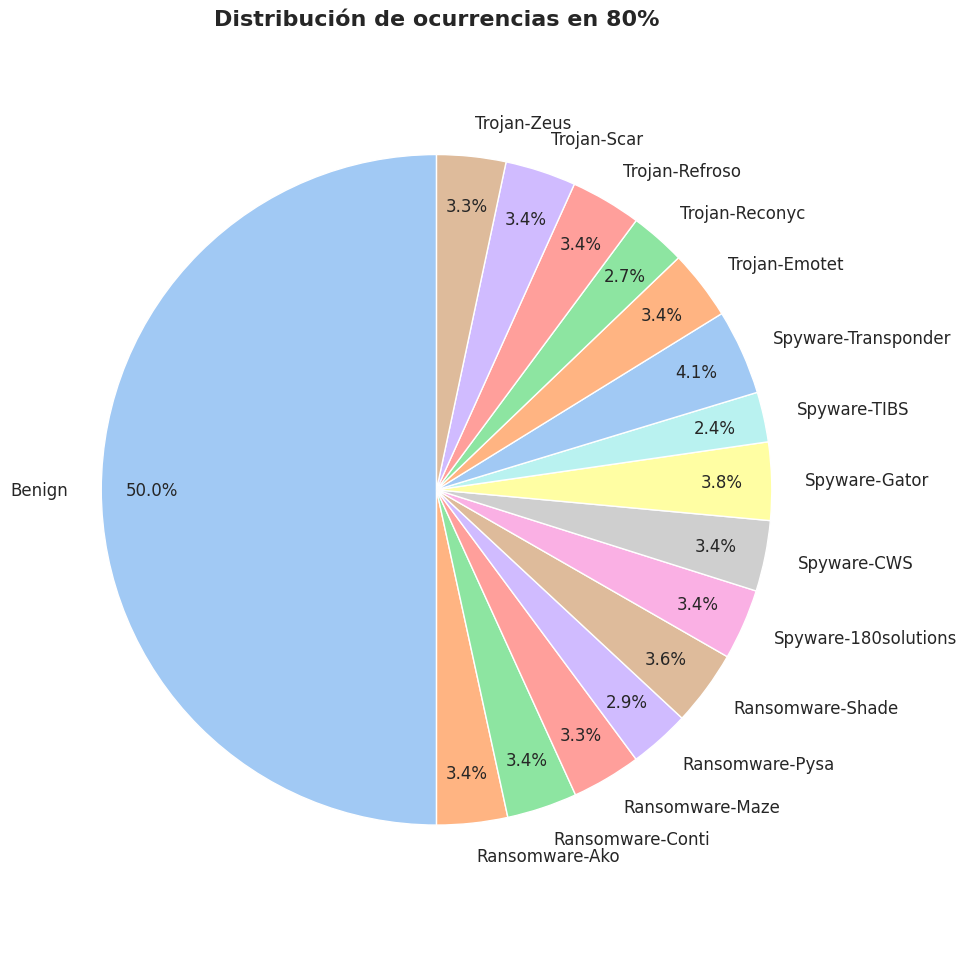

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de categorías
categorias = ['Benign', 'Ransomware-Ako', 'Ransomware-Conti', 'Ransomware-Maze', 'Ransomware-Pysa', 'Ransomware-Shade', 'Spyware-180solutions', 'Spyware-CWS', 'Spyware-Gator', 'Spyware-TIBS', 'Spyware-Transponder', 'Trojan-Emotet', 'Trojan-Reconyc', 'Trojan-Refroso', 'Trojan-Scar', 'Trojan-Zeus']

# Contar las ocurrencias de `1` en cada posición
conteos = [np.sum(y_train_2[:, i]) for i in range(y_train_2.shape[1])]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel con Seaborn
colors = sns.color_palette("pastel")
wedges, texts, autotexts = ax.pie(conteos, labels=categorias, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 12})

# Ajustar el aspecto para que el gráfico de pastel sea un círculo
ax.axis('equal')

# Configurar el título y el estilo del gráfico
plt.setp(autotexts, size=12)
ax.set_title('Distribución de ocurrencias en 80%', fontsize=16, fontweight='bold')
sns.set_style("dark")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [51]:
import numpy as np

# Lista de categorías
categorias = ['Benign', 'Ransomware-Ako', 'Ransomware-Conti', 'Ransomware-Maze', 'Ransomware-Pysa', 'Ransomware-Shade', 'Spyware-180solutions', 'Spyware-CWS', 'Spyware-Gator', 'Spyware-TIBS', 'Spyware-Transponder', 'Trojan-Emotet', 'Trojan-Reconyc', 'Trojan-Refroso', 'Trojan-Scar', 'Trojan-Zeus']

# Contar las ocurrencias de `1` en cada posición
conteos = [np.sum(y_test_2[:, i]) for i in range(y_test_2.shape[1])]

# Imprimir los conteos junto con las categorías correspondientes
for categoria, conteo in zip(categorias, conteos):
    print(f"{categoria}: {conteo}")

Benign: 5860.0
Ransomware-Ako: 400.0
Ransomware-Conti: 398.0
Ransomware-Maze: 392.0
Ransomware-Pysa: 343.0
Ransomware-Shade: 426.0
Spyware-180solutions: 400.0
Spyware-CWS: 400.0
Spyware-Gator: 440.0
Spyware-TIBS: 282.0
Spyware-Transponder: 482.0
Trojan-Emotet: 393.0
Trojan-Reconyc: 314.0
Trojan-Refroso: 400.0
Trojan-Scar: 400.0
Trojan-Zeus: 390.0


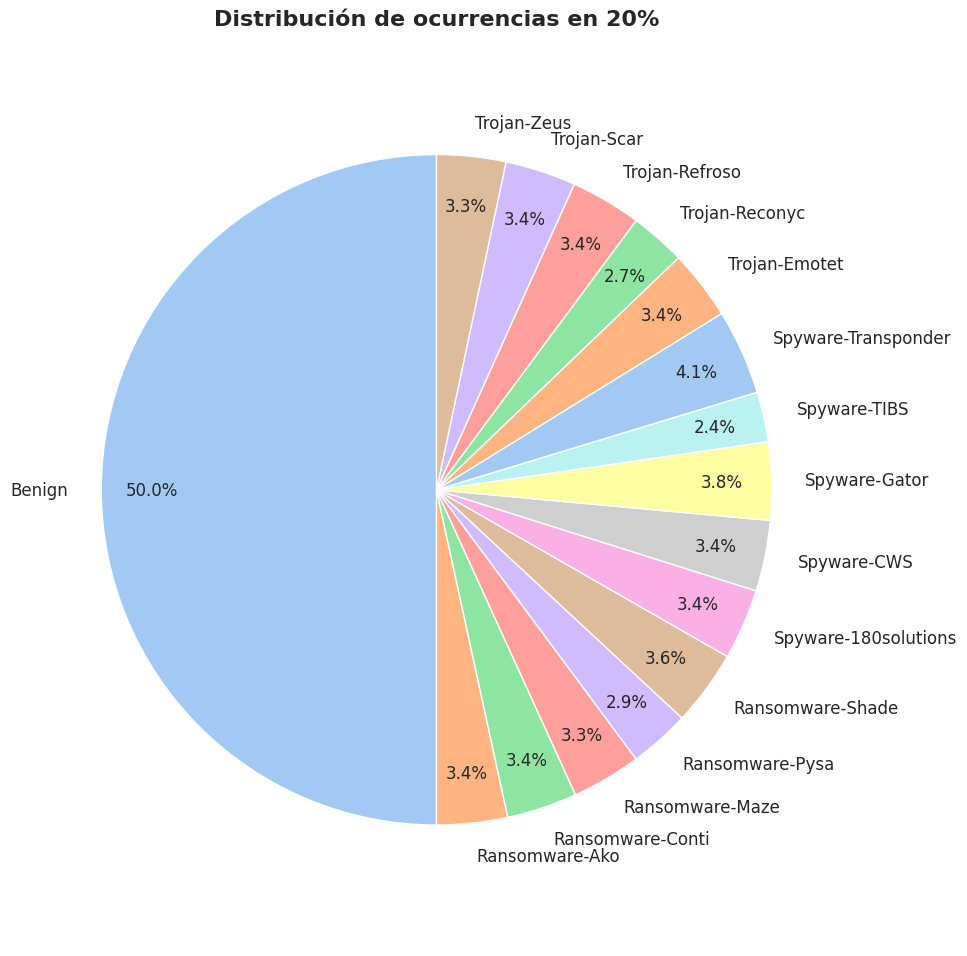

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de categorías
categorias = ['Benign', 'Ransomware-Ako', 'Ransomware-Conti', 'Ransomware-Maze', 'Ransomware-Pysa', 'Ransomware-Shade', 'Spyware-180solutions', 'Spyware-CWS', 'Spyware-Gator', 'Spyware-TIBS', 'Spyware-Transponder', 'Trojan-Emotet', 'Trojan-Reconyc', 'Trojan-Refroso', 'Trojan-Scar', 'Trojan-Zeus']

# Contar las ocurrencias de `1` en cada posición
conteos = [np.sum(y_test_2[:, i]) for i in range(y_test_2.shape[1])]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Crear el gráfico de pastel con Seaborn
colors = sns.color_palette("pastel")
wedges, texts, autotexts = ax.pie(conteos, labels=categorias, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, textprops={'fontsize': 12})

# Ajustar el aspecto para que el gráfico de pastel sea un círculo
ax.axis('equal')

# Configurar el título y el estilo del gráfico
plt.setp(autotexts, size=12)
ax.set_title('Distribución de ocurrencias en 20%', fontsize=16, fontweight='bold')
sns.set_style("dark")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Red neuronal múltiple de a mentis

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam

# Definir la arquitectura de la red neuronal
model_final3 = Sequential()

# Capas convolucionales
model_final3.add(Conv1D(32, 3, activation='relu', input_shape=(43, 1)))
model_final3.add(MaxPooling1D(2))

model_final3.add(Conv1D(64, 3, activation='relu'))
model_final3.add(MaxPooling1D(2))

model_final3.add(Conv1D(128, 3, activation='relu'))

# Capa de dropout
model_final3.add(Dropout(0.5))

# Capa de aplanado
model_final3.add(Flatten())

# Capas densas
model_final3.add(Dense(512, activation='relu'))
model_final3.add(BatchNormalization())
model_final3.add(Dropout(0.4))

model_final3.add(Dense(256, activation='relu'))
model_final3.add(BatchNormalization())
model_final3.add(Dropout(0.4))

model_final3.add(Dense(128, activation='relu'))
model_final3.add(BatchNormalization())
model_final3.add(Dropout(0.4))

model_final3.add(Dense(64, activation='relu'))
model_final3.add(BatchNormalization())
model_final3.add(Dropout(0.4))

model_final3.add(Dense(32, activation='relu'))

# Capa de salida con activación softmax
model_final3.add(Dense(16, activation='softmax'))

# Compilar el modelo
model_final3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ajustar el modelo con los datos de entrenamiento
history = model_final3.fit(X_train_2.reshape(X_train_2.shape[0], X_train_2.shape[1], 1), y_train_2,
                    epochs=3000,
                    batch_size=500,
                    validation_data=(X_test_2.reshape(X_test_2.shape[0], X_test_2.shape[1], 1), y_test_2))
# Guardar el modelo entrenado
from keras.models import load_model

# Guardar el modelo entrenado
model_final3.save('modelo_multiple_entrenado.h5')


Epoch 1/3000
94/94 [==============================] - 9s 55ms/step - loss: 1.7749 - accuracy: 0.4620 - val_loss: 1.9249 - val_accuracy: 0.5000
Epoch 2/3000
94/94 [==============================] - 5s 51ms/step - loss: 1.4166 - accuracy: 0.5321 - val_loss: 2.1969 - val_accuracy: 0.5000
Epoch 3/3000
94/94 [==============================] - 5s 56ms/step - loss: 1.3798 - accuracy: 0.5362 - val_loss: 2.2496 - val_accuracy: 0.5000
Epoch 4/3000
94/94 [==============================] - 6s 59ms/step - loss: 1.3640 - accuracy: 0.5381 - val_loss: 1.9240 - val_accuracy: 0.5004
Epoch 5/3000
94/94 [==============================] - 6s 67ms/step - loss: 1.3567 - accuracy: 0.5385 - val_loss: 1.5082 - val_accuracy: 0.5295
Epoch 6/3000
94/94 [==============================] - 5s 52ms/step - loss: 1.3523 - accuracy: 0.5398 - val_loss: 1.3511 - val_accuracy: 0.5413
Epoch 7/3000
94/94 [==============================] - 5s 51ms/step - loss: 1.3508 - accuracy: 0.5406 - val_loss: 1.3410 - val_accuracy: 0.543

C:\Users\Zeran\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Guardar el modelo entrenado
from keras.models import load_model

# Guardar el modelo entrenado
model_final3.save('modelo_multiple_entrenado.keras')

In [ ]:
# Cargar el modelo entrenado
from keras.models import load_model

# Cargar el modelo guardado
modelo_multiple = load_model('modelo_multiple_entrenado.keras')

# Ahora puedes usar el modelo cargado para hacer predicciones
predicciones = modelo_multiple.predict(X_train_2)

1465/1465 [==============================] - 5s 3ms/step


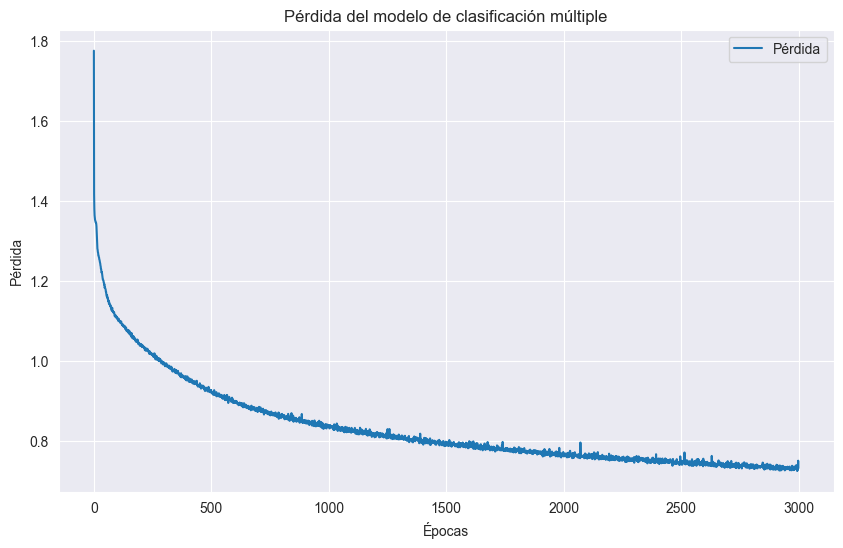

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Pérdida')
#sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del modelo de clasificación múltiple')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
# Graficar accuracy
#plt.figure(figsize=(10, 6))
#sns.set_style("darkgrid")
#sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy')
#sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy')
#plt.title('Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.legend()
#plt.show()

# Prueba con mucho más épocas (Ésta es la chida)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam

# Definir la arquitectura de la red neuronal
model_final4 = Sequential()

# Capas convolucionales
model_final4.add(Conv1D(32, 3, activation='relu', input_shape=(43, 1)))
model_final4.add(MaxPooling1D(2))

model_final4.add(Conv1D(64, 3, activation='relu'))
model_final4.add(MaxPooling1D(2))

model_final4.add(Conv1D(128, 3, activation='relu'))

# Capa de dropout
model_final4.add(Dropout(0.5))

# Capa de aplanado
model_final4.add(Flatten())

# Capas densas
model_final4.add(Dense(512, activation='relu'))
model_final4.add(BatchNormalization())
model_final4.add(Dropout(0.4))

model_final4.add(Dense(256, activation='relu'))
model_final4.add(BatchNormalization())
model_final4.add(Dropout(0.4))

model_final4.add(Dense(128, activation='relu'))
model_final4.add(BatchNormalization())
model_final4.add(Dropout(0.4))

model_final4.add(Dense(64, activation='relu'))
model_final4.add(BatchNormalization())
model_final4.add(Dropout(0.4))

model_final4.add(Dense(32, activation='relu'))

# Capa de salida con activación softmax
model_final4.add(Dense(16, activation='softmax'))

# Compilar el modelo
model_final4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ajustar el modelo con los datos de entrenamiento
history = model_final4.fit(X_train_2.reshape(X_train_2.shape[0], X_train_2.shape[1], 1), y_train_2,
                    epochs=20000,
                    batch_size=500,
                    validation_data=(X_test_2.reshape(X_test_2.shape[0], X_test_2.shape[1], 1), y_test_2))
# Guardar el modelo entrenado
from keras.models import load_model

# Guardar el modelo entrenado
model_final4.save('modelo_multiple_entrenado.keras')




Epoch 1/20000


94/94 [==============================] - 11s 62ms/step - loss: 1.7958 - accuracy: 0.4479 - val_loss: 2.4255 - val_accuracy: 0.5000
Epoch 2/20000
94/94 [==============================] - 5s 51ms/step - loss: 1.4046 - accuracy: 0.5343 - val_loss: 2.7563 - val_accuracy: 0.5000
Epoch 3/20000
94/94 [==============================] - 4s 48ms/step - loss: 1.3779 - accuracy: 0.5377 - val_loss: 2.8901 - val_accuracy: 0.5000
Epoch 4/20000
94/94 [==============================] - 4s 47ms/step - loss: 1.3628 - accuracy: 0.5401 - val_loss: 2.2817 - val_accuracy: 0.5000
Epoch 5/20000
94/94 [==============================] - 5s 49ms/step - loss: 1.3577 - accuracy: 0.5421 - val_loss: 1.3817 - val_accuracy: 0.5404
Epoch 6/20000
94/94 [==============================] - 4s 47ms/step - loss: 1.3499 - accuracy: 0.5450 - val_loss: 1.3541 - val_accuracy: 0.5460
Epoch 7/20000
94/94 [==============================] - 4s 47ms/step - loss: 1.3382 - accuracy: 0.5465 - val_loss: 1.3139 - val_acc

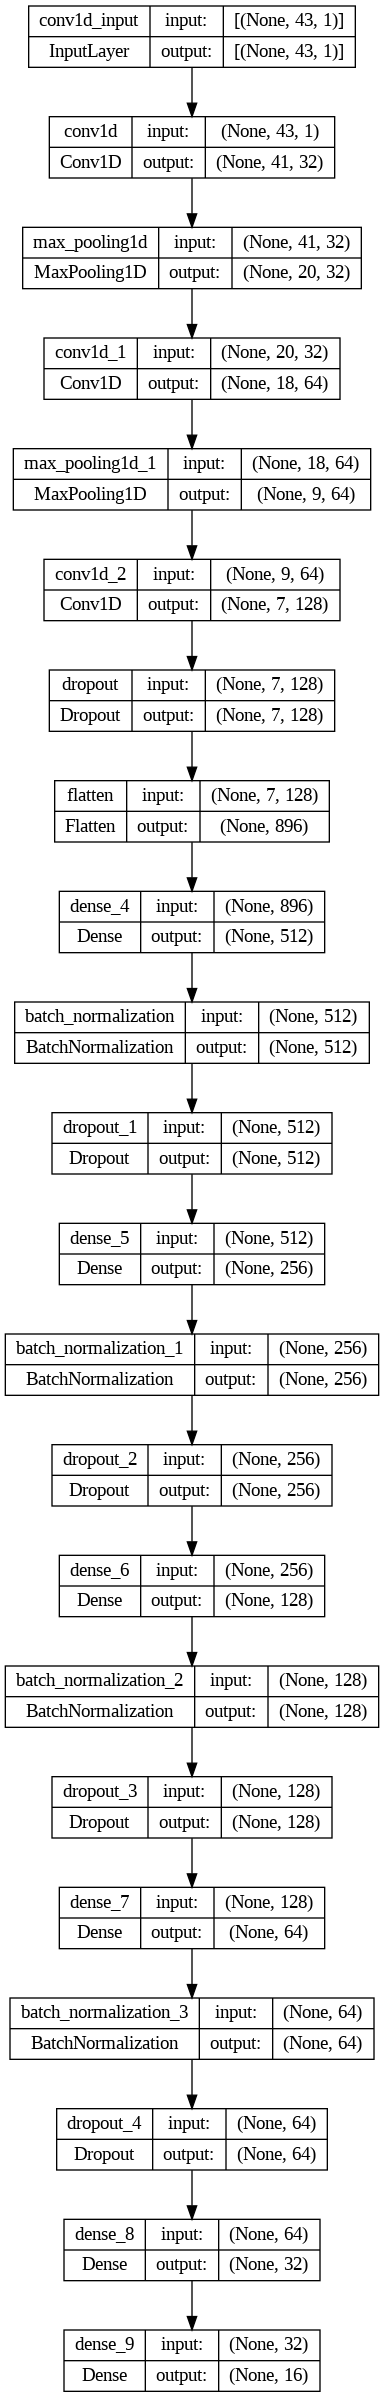

In [ ]:
from keras.utils import plot_model

# Graficar la arquitectura del modelo
plot_model(model_final4, to_file='modelo_multiple.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_final4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 41, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 9, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 7, 128)            24704     
                                                                 
 dropout (Dropout)           (None, 7, 128)           

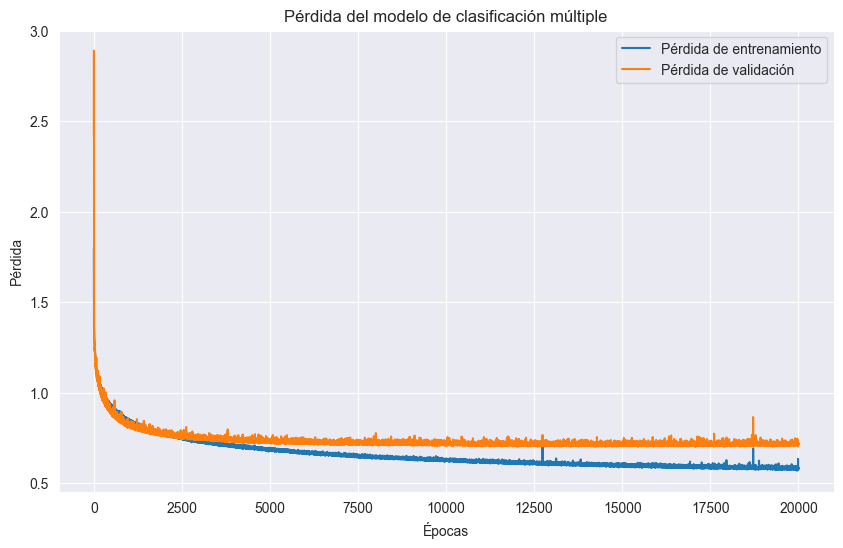

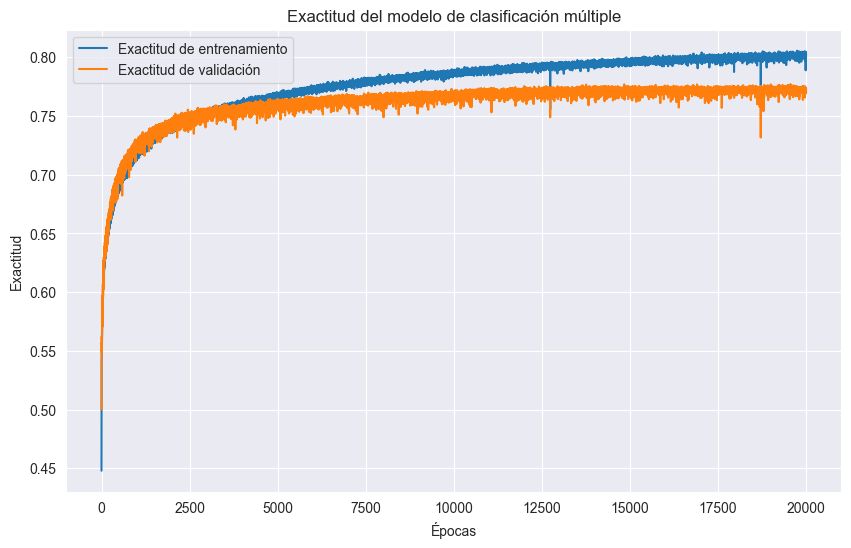

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Pérdida de entrenamiento')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo de clasificación múltiple')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Exactitud de entrenamiento')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Exactitud de validación')
plt.title('Exactitud del modelo de clasificación múltiple')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

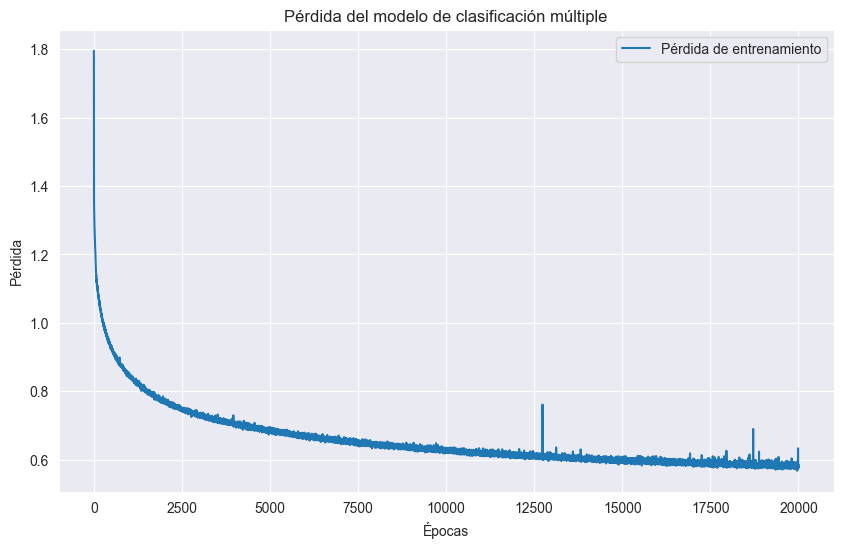

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Pérdida de entrenamiento')
#sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo de clasificación múltiple')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
# Guardar el modelo entrenado
from keras.models import load_model

# Guardar el modelo entrenado
model_final4.save('modelo_multiple_entrenado.keras')

## Esta parte la hice en mi PC, por eso no funciona esta parte, tiene un detalle de MS windows -> linux

In [53]:
# Cargar el modelo entrenado
from keras.models import load_model

# Cargar el modelo guardado
modelo_multiple = load_model('/content/drive/MyDrive/modelo_multiple/modelo_multiple_entrenado.keras')

# Ahora puedes usar el modelo cargado para hacer predicciones
predicciones = modelo_multiple.predict(X_test_2)

ValueError: Layer 'conv1d' expected 2 variables, but received 0 variables during loading. Expected: ['conv1d/kernel:0', 'conv1d/bias:0']

# Graficas anteriores (Del modelo con 6000 epocas)

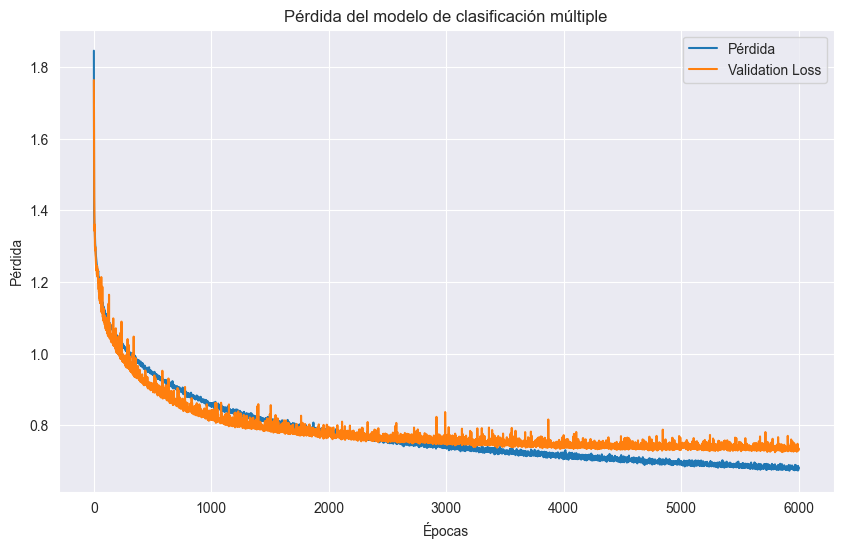

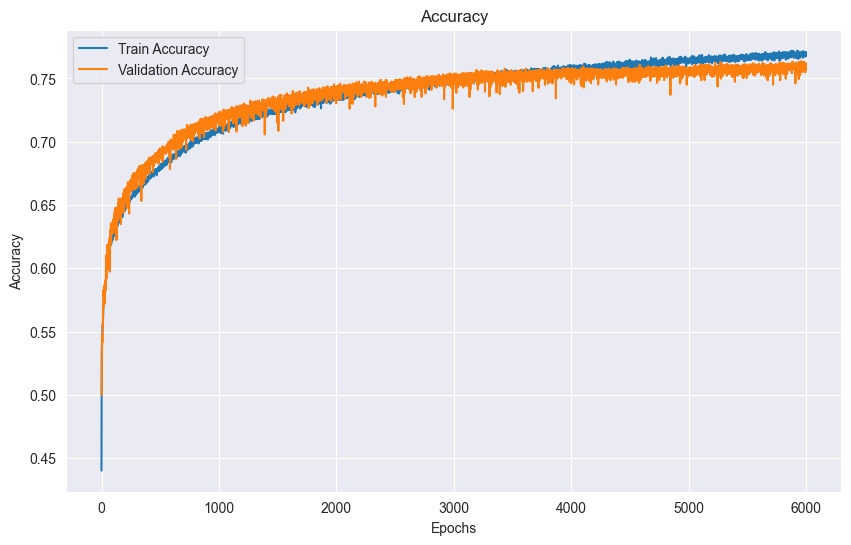

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Pérdida')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del modelo de clasificación múltiple')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar accuracy
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='Train Accuracy')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

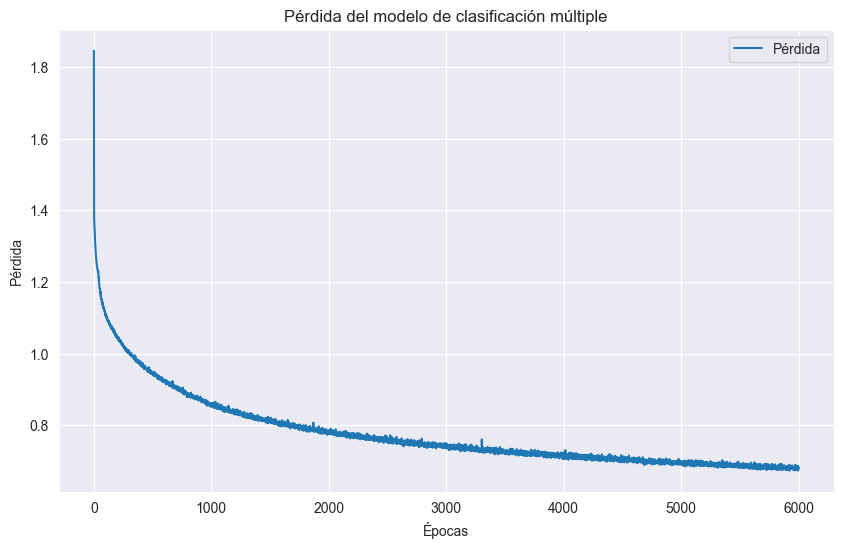

In [ ]:
import seaborn as sns

# Graficar loss
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='Pérdida')
#sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida del modelo de clasificación múltiple')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Comienzan las métricas (de igual manera esto lo ejecuté en mi PC)

In [ ]:
# Convertir las predicciones continuas en etiquetas discretas
y_pred = np.round(predicciones).astype(int)


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Lista de categorías
categorias = ['Benign', 'Ransomware-Ako', 'Ransomware-Conti', 'Ransomware-Maze', 'Ransomware-Pysa', 'Ransomware-Shade', 'Spyware-180solutions', 'Spyware-CWS', 'Spyware-Gator', 'Spyware-TIBS', 'Spyware-Transponder', 'Trojan-Emotet', 'Trojan-Reconyc', 'Trojan-Refroso', 'Trojan-Scar', 'Trojan-Zeus']

# Obtener las predicciones y las etiquetas reales
y_pred = predicciones
y_true = y_test_2

# Calcular la matriz de confusión
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)
matriz_confusion = confusion_matrix(y_true_classes, y_pred_classes)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(matriz_confusion)

Matriz de confusión:
[[5860    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0  145   33   27   16   32    6   19   18    3   28    4    8   14
     9   38]
 [   0   16  195    9    5   26    7    3   35    6    9    8    4    9
    14   52]
 [   0   30   24  185   11    8    6   10   18    0   15    1    1    7
     9   67]
 [   0   28   24   16  121   17    2   11   10    1   10   26    2    8
     5   62]
 [   0   12   31   17   11  227    7    6   14    2   11    9    6    8
     4   61]
 [   0    8   12    3    3   14  135   15   31    3   81   24   17   31
    17    6]
 [   0   19   10    2    5   20    9  159   39   11   89    7    4    6
    12    8]
 [   0    1    4    4    1   10    6    1  353    4   31    3    1    6
     1   14]
 [   0    3    5    1    2    3    2   12   19  181   30    4    0    5
     3   12]
 [   0   12    1   12    8   10   10   75   61    5  265    1    6    7
     7    2]
 [   0    3   18    6   11   35   12    2   

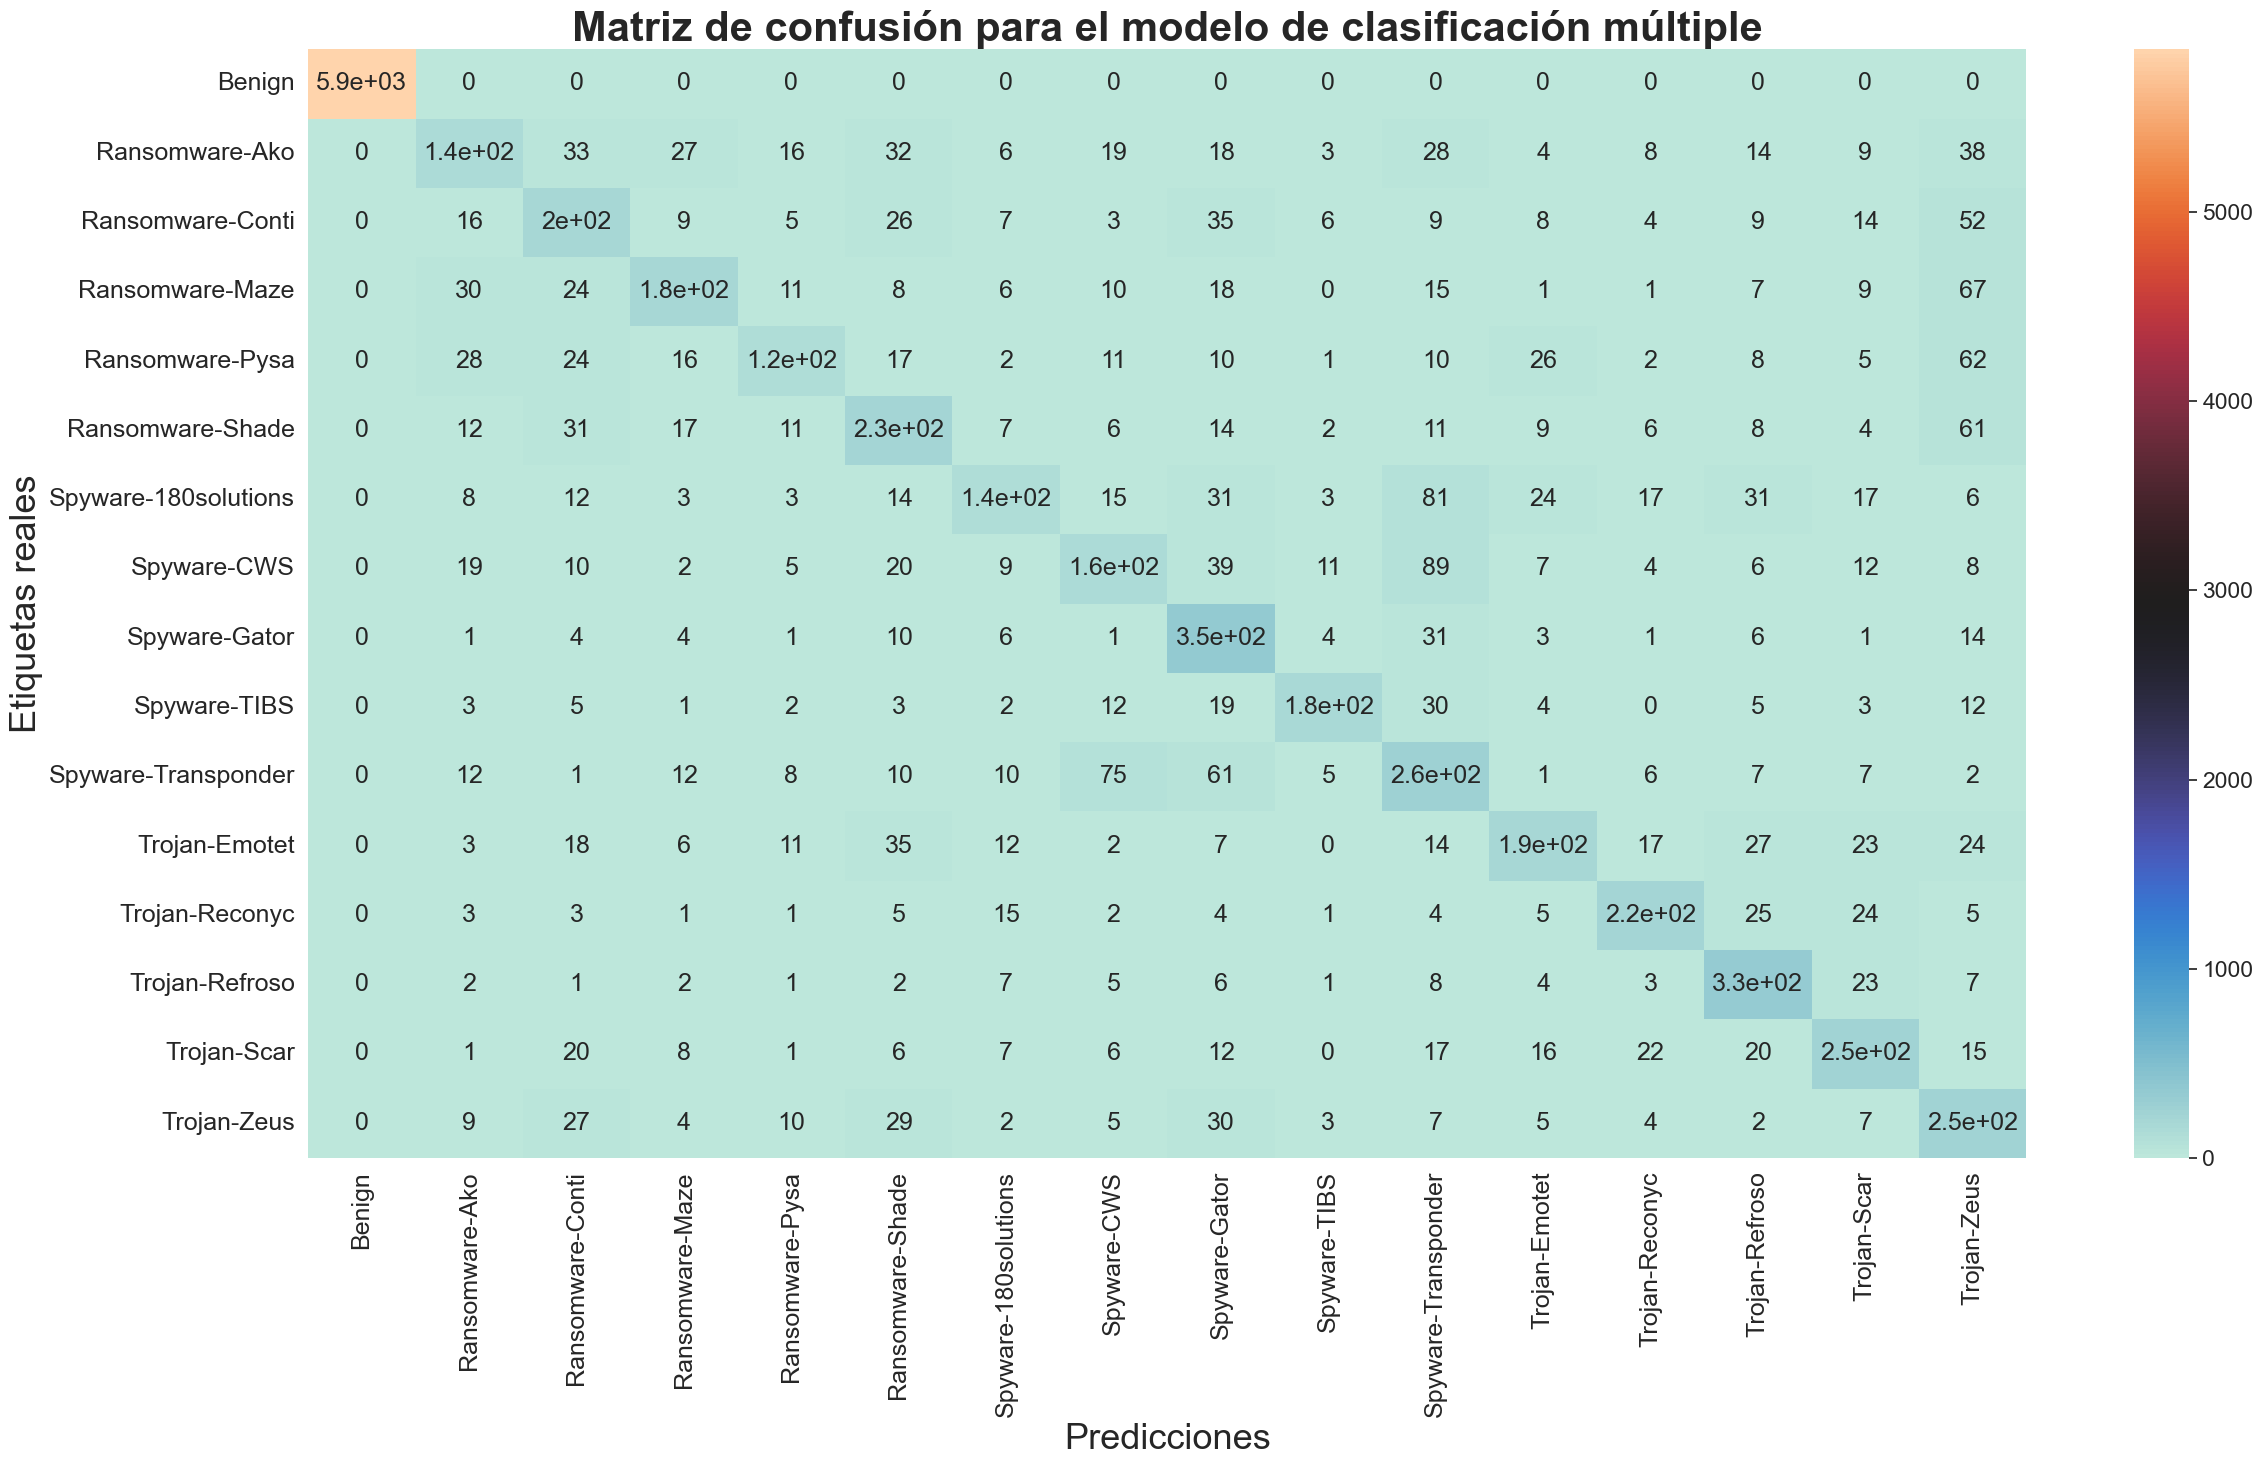

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de categorías
categorias = ['Benign', 'Ransomware-Ako', 'Ransomware-Conti', 'Ransomware-Maze', 'Ransomware-Pysa', 'Ransomware-Shade', 'Spyware-180solutions', 'Spyware-CWS', 'Spyware-Gator', 'Spyware-TIBS', 'Spyware-Transponder', 'Trojan-Emotet', 'Trojan-Reconyc', 'Trojan-Refroso', 'Trojan-Scar', 'Trojan-Zeus']

# Obtener las predicciones y las etiquetas reales
y_pred = predicciones
y_true = y_test_2

# Calcular la matriz de confusión
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)
matriz_confusion = confusion_matrix(y_true_classes, y_pred_classes)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(25, 15))

# Graficar la matriz de confusión con Seaborn
sns.heatmap(matriz_confusion, annot=True, cmap="icefire", xticklabels=categorias, yticklabels=categorias, ax=ax)

# Configurar las etiquetas de los ejes y el título
ax.set_xlabel('Predicciones', fontsize=26)
ax.set_ylabel('Etiquetas reales', fontsize=26)
ax.set_title('Matriz de confusión para el modelo de clasificación múltiple', fontsize=30, fontweight='bold')

# Ajustar el tamaño de las etiquetas de los ejes
plt.xticks(rotation=90, fontsize=18)
plt.yticks(fontsize=18)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Obtener las predicciones y las etiquetas reales
y_pred = predicciones
y_true = y_test_2

# Calcular las predicciones de clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Precisión (accuracy): {accuracy}")

# Calcular la precisión (precision), el recall y el puntaje F1 promedio
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')
print(f"Precisión (precision): {precision}")
print(f"Recall: {recall}")
print(f"Puntaje F1: {f1}")

# Obtener el reporte de clasificación
report = classification_report(y_true_classes, y_pred_classes, target_names=categorias)
print("Reporte de clasificación:")
print(report)

Precisión (accuracy): 0.7729522184300341
Precisión (precision): 0.5948128429473226
Recall: 0.5746085800081079
Puntaje F1: 0.573844223325955
Reporte de clasificación:
                      precision    recall  f1-score   support

              Benign       1.00      1.00      1.00      5860
      Ransomware-Ako       0.50      0.36      0.42       400
    Ransomware-Conti       0.48      0.49      0.48       398
     Ransomware-Maze       0.62      0.47      0.54       392
     Ransomware-Pysa       0.58      0.35      0.44       343
    Ransomware-Shade       0.51      0.53      0.52       426
Spyware-180solutions       0.58      0.34      0.43       400
         Spyware-CWS       0.48      0.40      0.44       400
       Spyware-Gator       0.54      0.80      0.64       440
        Spyware-TIBS       0.82      0.64      0.72       282
 Spyware-Transponder       0.43      0.55      0.48       482
       Trojan-Emotet       0.62      0.49      0.55       393
      Trojan-Reconyc       